In [5]:
import pandas as pd
from pandas import DataFrame
import datetime as dt
import json

#### Import BTC data

In [7]:
timeframe="1h"
pair="BTCUSDT"
filename = f"/media/andy/UbuntuDisk/CryptoData/traderrobot/Aggregated/futures/{timeframe}/{pair}-{timeframe}.h5"
df:DataFrame = pd.read_hdf(filename)
start_date = dt.datetime(2022,1,1).timestamp()*1000
end_date = dt.datetime(2022,12,30).timestamp()*1000
df = df.loc[start_date:end_date]

<Axes: xlabel='Open Time'>

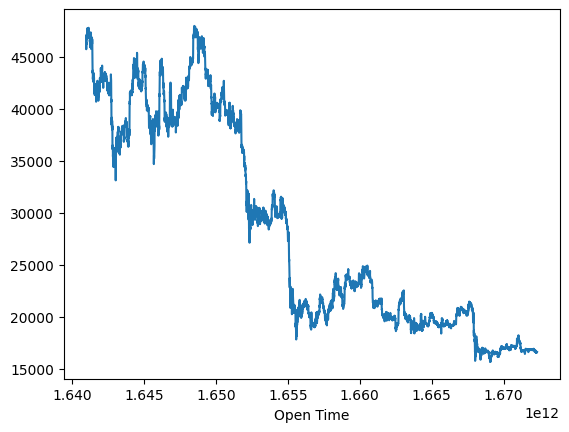

In [13]:
df["Close"].plot()

### Calculate volatile

In [38]:
df["Swing"] = (df["High"] - df["Low"])/df["Close"]

In [47]:
def draw(strategy):
    file = json.load(open("../backtest_results/.last_result.json"))["latest_backtest"]
    backtest_result = json.load(open(f"../backtest_results/{file}"))
    daily_profit = backtest_result["strategy"][f"{strategy}"]["daily_profit"]
    df = pd.DataFrame(data=daily_profit,columns=["date","profit"])
    df["cumsum_profit"]=df["profit"].cumsum()
    df["cumsum_profit"].plot()

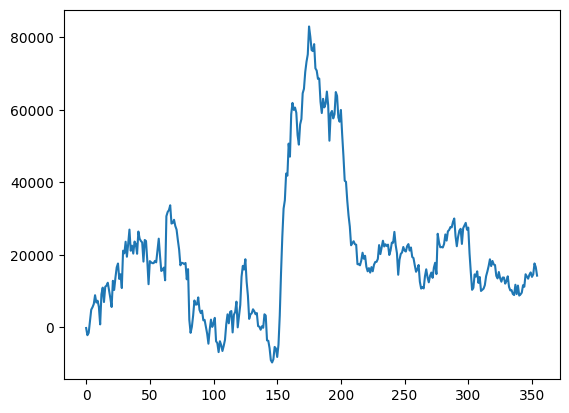

In [52]:
draw("SharpeLessExitArbitrage")

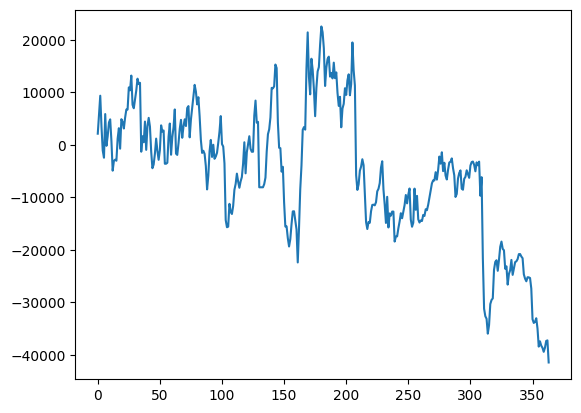

In [50]:
draw("SharpeNoDiffArbitrage")

<Axes: xlabel='Open Time'>

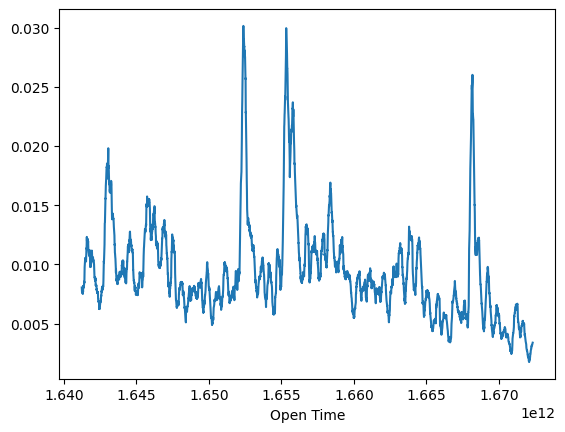

In [46]:
df["Swing"].rolling(24*3).mean().plot()

<Axes: xlabel='Open Time'>

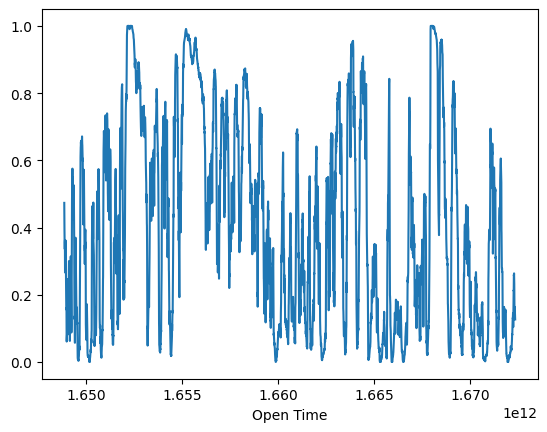

In [40]:
df["Swing"].rolling(36).mean().rolling(3 *  30 * 24).rank(pct=True).plot()